# Main Code 

# packages Importation

In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath('../Project')))
from Project.Prediction import ClassModel  as md
from Project.Prediction import DataCollection as dc
import pandas as pd


### import data from Project package

In [5]:
df = dc.Data().impo()
df.head(10)

,Time,Consommation (MW),Gaz (MW),Nucléaire (MW)
0,2019-01-01 00:00:00,64207.0,3430.0,55577.0
1,2019-01-01 00:15:00,63684.5,3229.5,55894.0
2,2019-01-01 00:30:00,63162.0,3029.0,56211.0
3,2019-01-01 00:45:00,62042.5,2943.5,55625.0
4,2019-01-01 01:00:00,60923.0,2858.0,55039.0
5,2019-01-01 01:15:00,60826.0,2862.0,55154.0
6,2019-01-01 01:30:00,60729.0,2866.0,55269.0
7,2019-01-01 01:45:00,60428.0,2845.5,55109.5
8,2019-01-01 02:00:00,60127.0,2825.0,54950.0
9,2019-01-01 02:15:00,59786.5,2828.5,54998.5


### Siting the "Time" variable as index in convert it into a data time 

In [6]:
df.set_index("Time", inplace = True)
df.index = pd.to_datetime(df.index)
df.tail(5)

,Consommation (MW),Gaz (MW),Nucléaire (MW)
Time,,,
2022-12-06 17:45:00,70553.0,8359.0,36545.0
2022-12-06 18:00:00,71257.0,8350.0,36543.0
2022-12-06 18:15:00,71685.0,8229.0,36522.0
2022-12-06 18:30:00,72746.0,8248.0,36495.0
2022-12-06 18:45:00,72746.0,8318.0,36491.0


# predict the Consumption on Thursday 8 December for the whole day 

### Calling the Dos class and creating featurs by calling the "createFeatures()" method

In [7]:
Model = md.Dos(df, 0, 2022, 12, 8)  
Featurs = Model.createFeatures()
Featurs

,Consommation (MW),Gaz (MW),Nucléaire (MW),minute,dayofweek,month,year,dayofyear,dayofmonth,lag1,lag2,lag3
Time,,,,,,,,,,,,
2019-01-01 00:00:00,64207.0,3430.0,55577.0,0,1,1,2019,1,1,NaN,NaN,NaN
2019-01-01 00:15:00,63684.5,3229.5,55894.0,15,1,1,2019,1,1,NaN,NaN,NaN
2019-01-01 00:30:00,63162.0,3029.0,56211.0,30,1,1,2019,1,1,NaN,NaN,NaN
2019-01-01 00:45:00,62042.5,2943.5,55625.0,45,1,1,2019,1,1,NaN,NaN,NaN
2019-01-01 01:00:00,60923.0,2858.0,55039.0,0,1,1,2019,1,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-06 17:45:00,70553.0,8359.0,36545.0,45,1,12,2022,340,6,76184.0,45852.0,64209.0
2022-12-06 18:00:00,71257.0,8350.0,36543.0,0,1,12,2022,340,6,76880.0,47161.0,64641.0
2022-12-06 18:15:00,71685.0,8229.0,36522.0,15,1,12,2022,340,6,77336.0,48289.0,65521.0


### Fiting the model by calling the class "fitModel()"

In [8]:
reg = Model.fitModel()

[20:01:57] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:52802.97340
[100]	validation_0-rmse:19810.80271
[200]	validation_0-rmse:8270.05103
[300]	validation_0-rmse:4807.17865
[400]	validation_0-rmse:4015.40022
[499]	validation_0-rmse:3832.04064


### Predict 8 Decembre 2022

In [21]:
dayPred, date = Model.DayPred(reg)
dayPred

,Date,Heure,Nucléaire (MW)
0,2022-12-08,00:00,36816.433594
1,2022-12-08,00:15,37399.394531
2,2022-12-08,00:30,36816.433594
3,2022-12-08,00:45,36744.906250
4,2022-12-08,01:00,36744.906250
...,...,...,...
91,2022-12-08,22:45,37399.394531
92,2022-12-08,23:00,37399.394531
93,2022-12-08,23:15,37683.089844
94,2022-12-08,23:30,37742.304688


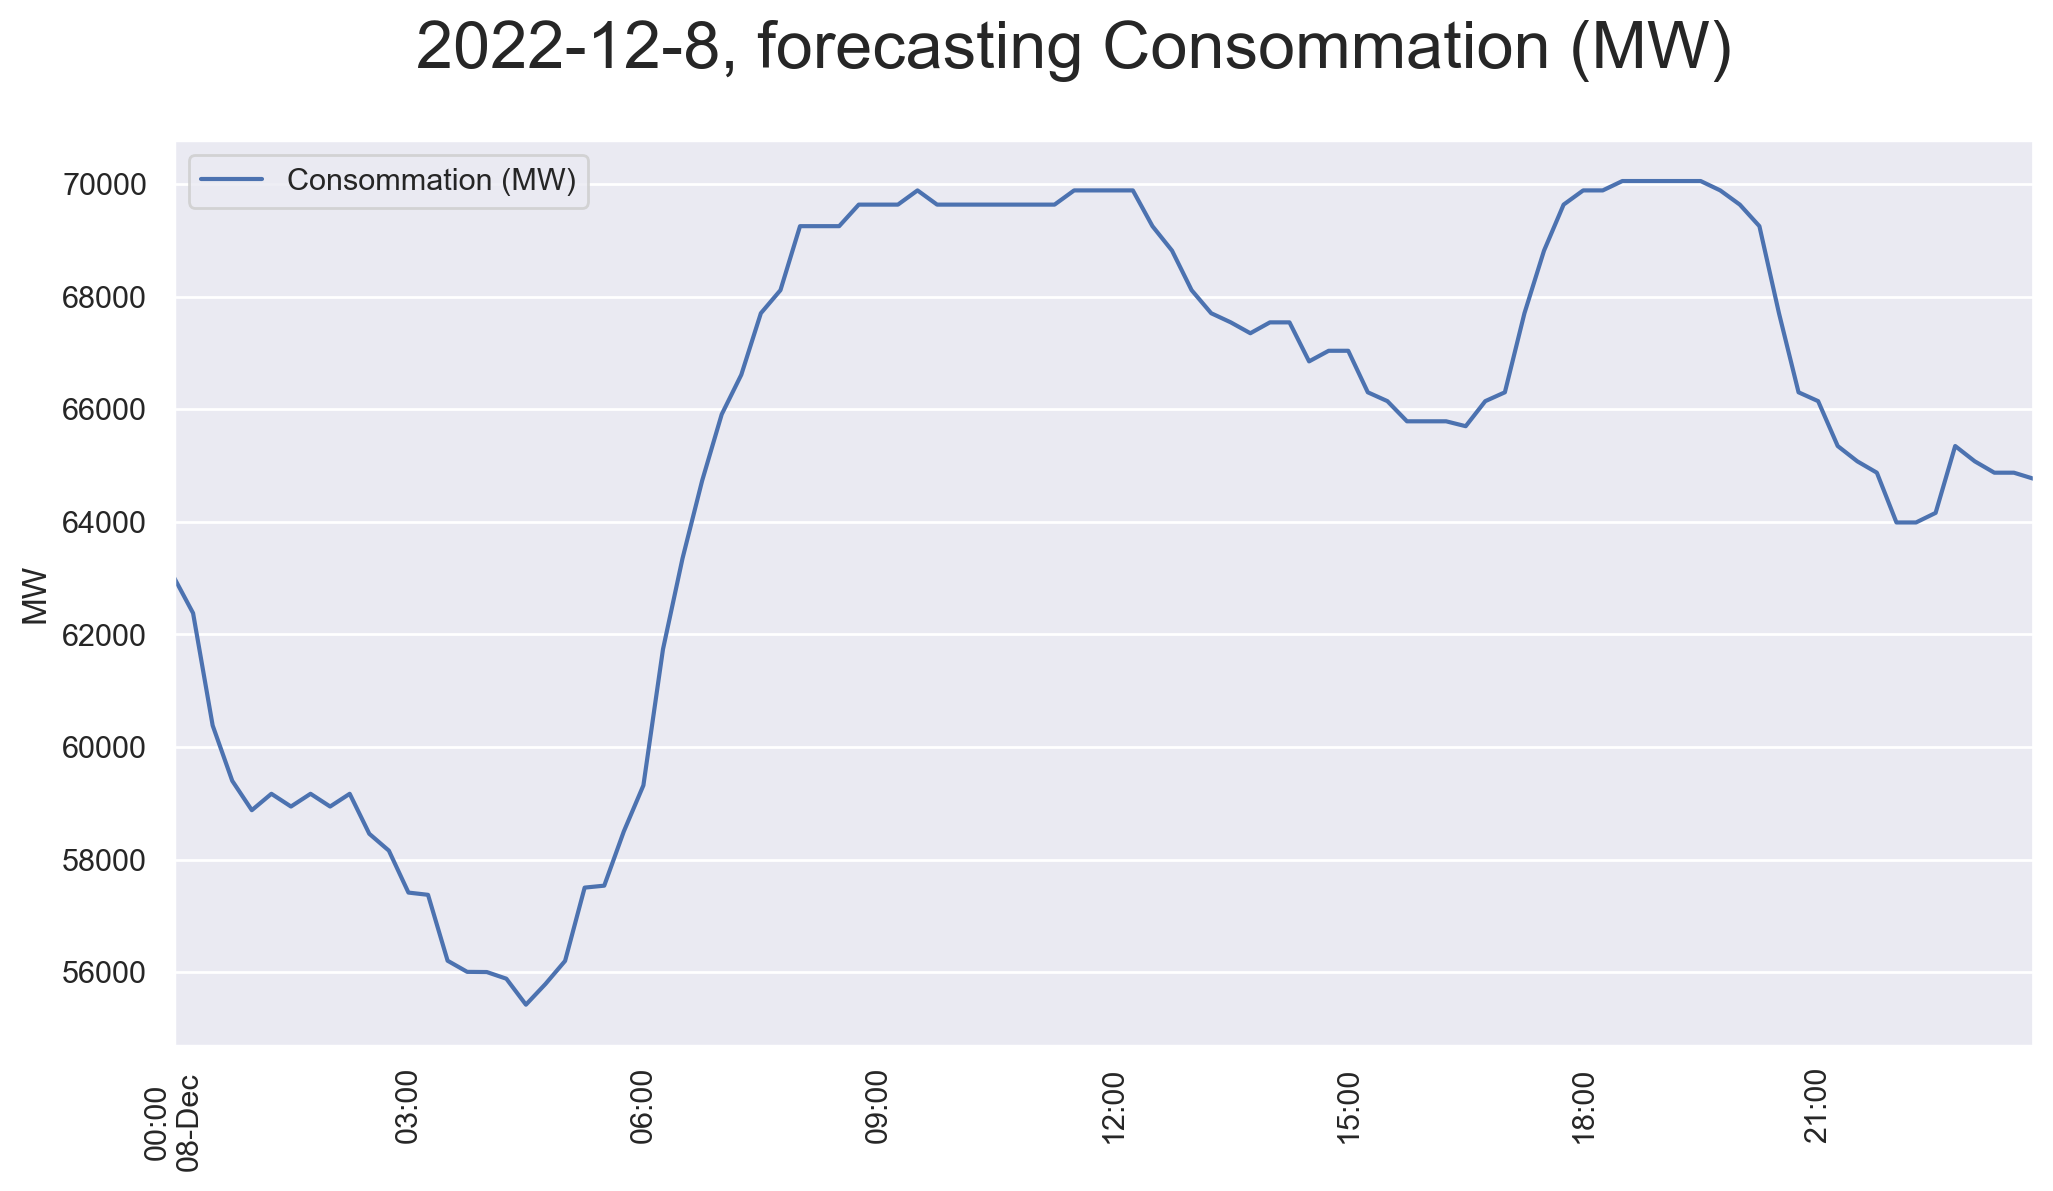

In [15]:
Model.plot(dayPred,date)

# predict the Gaz on Thursday 8 December for the whole day 

In [16]:
Model = md.Dos(df, 1,2022,12,8)  
Featurs = Model.createFeatures()
reg = Model.fitModel()
dayPred, date = Model.DayPred(reg)
dayPred

[20:06:10] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:4764.57136
[100]	validation_0-rmse:2227.86480
[200]	validation_0-rmse:1526.90754
[300]	validation_0-rmse:1351.01363
[400]	validation_0-rmse:1295.22823
[499]	validation_0-rmse:1267.48133


,Date,Heure,Gaz (MW)
0,2022-12-08,00:00,7484.204102
1,2022-12-08,00:15,7664.306641
2,2022-12-08,00:30,7136.399414
3,2022-12-08,00:45,7129.064453
4,2022-12-08,01:00,7129.064453
...,...,...,...
91,2022-12-08,22:45,7175.876953
92,2022-12-08,23:00,7136.399414
93,2022-12-08,23:15,7136.399414
94,2022-12-08,23:30,6981.174805


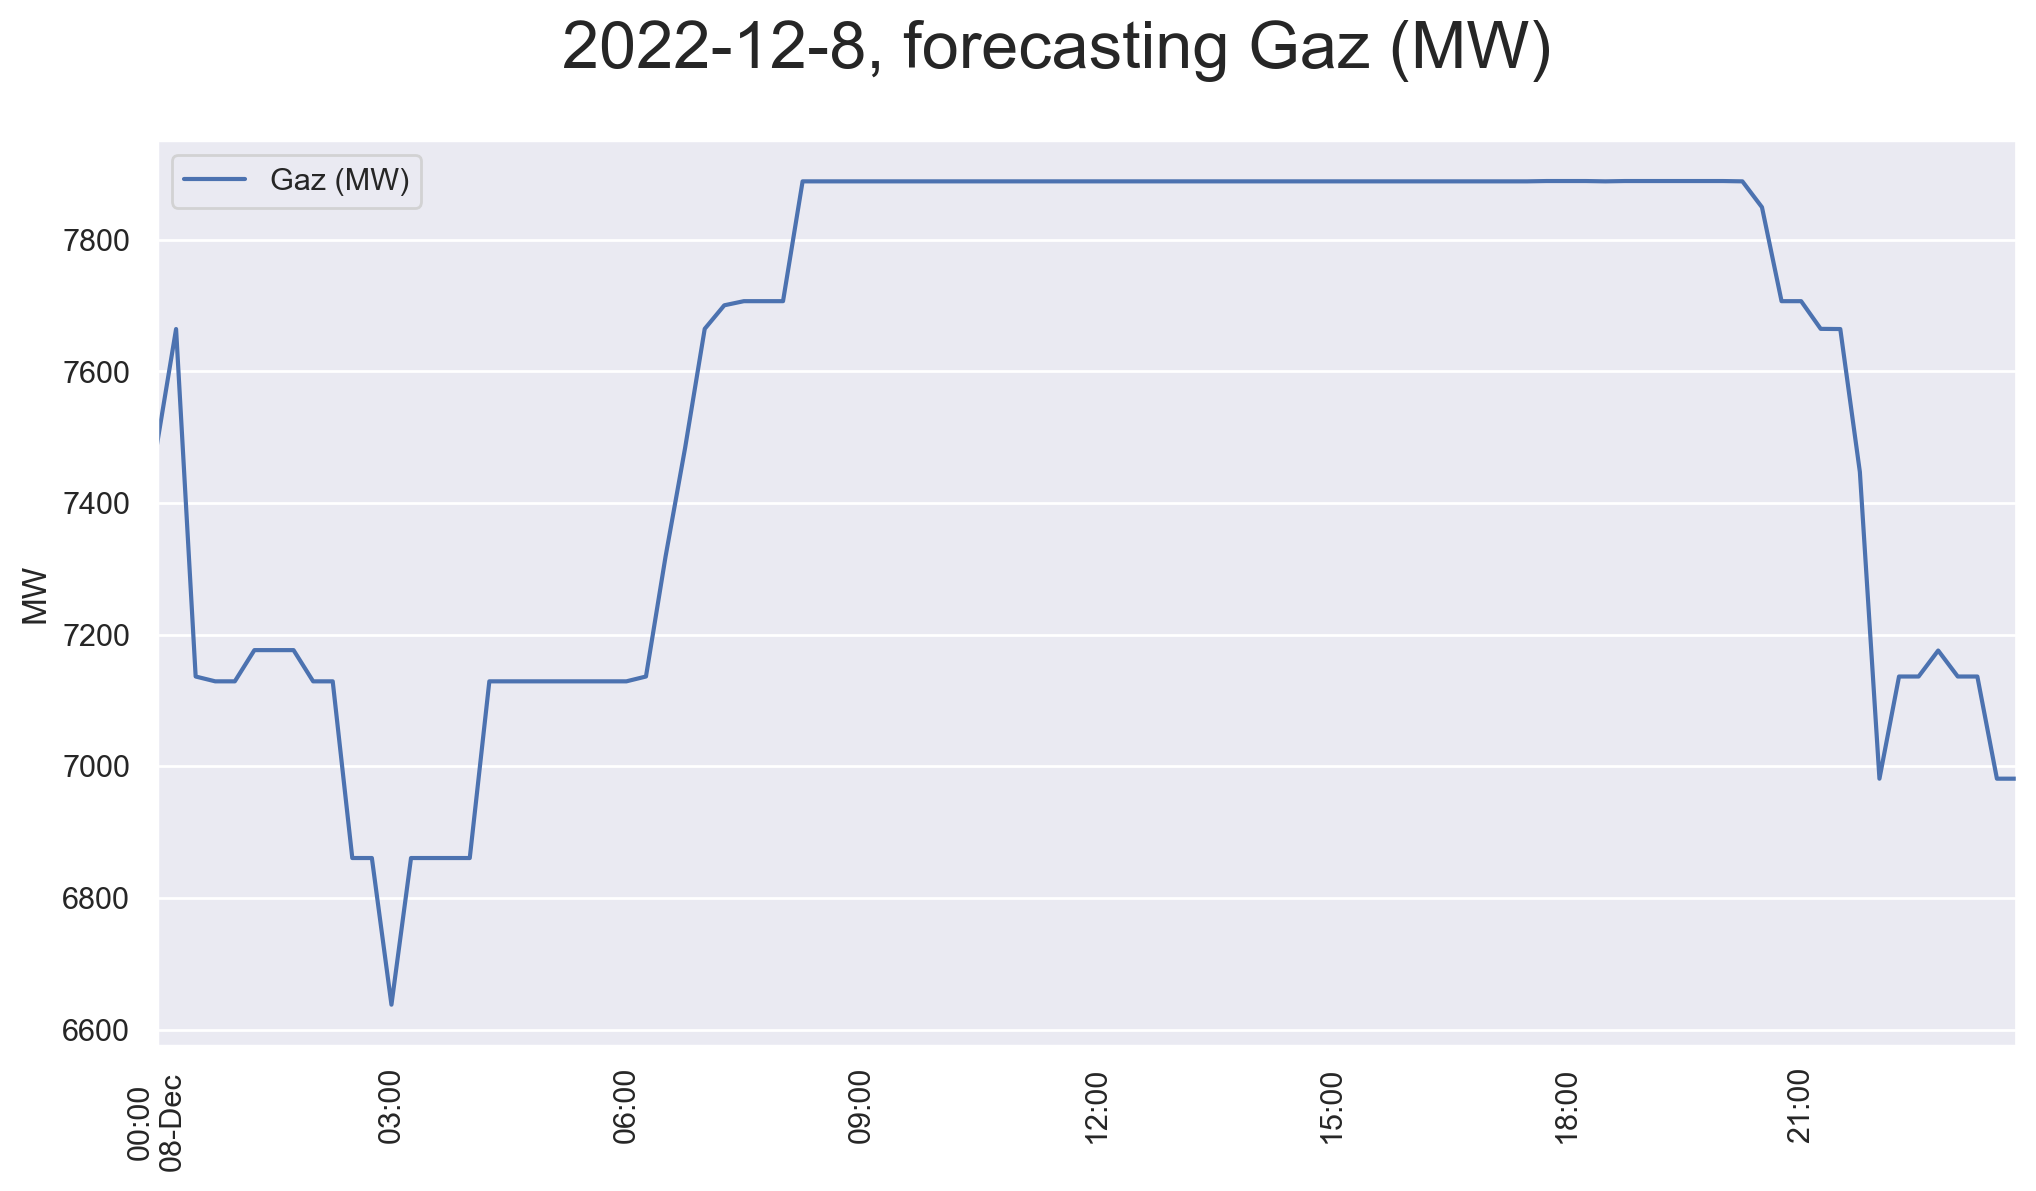

In [18]:
Model.plot(dayPred,date)

# predict the Nucléaire  on Thursday 8 December for the whole day 

In [19]:
Model = md.Dos(df, 2, 2022, 12, 8)  
Featurs = Model.createFeatures()
reg = Model.fitModel()
dayPred, date = Model.DayPred(reg)
dayPred

[20:07:48] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:39026.05247
[100]	validation_0-rmse:14495.48329
[200]	validation_0-rmse:5751.09672
[300]	validation_0-rmse:2964.92023
[400]	validation_0-rmse:2277.75783
[499]	validation_0-rmse:2126.65260


,Date,Heure,Nucléaire (MW)
0,2022-12-08,00:00,36816.433594
1,2022-12-08,00:15,37399.394531
2,2022-12-08,00:30,36816.433594
3,2022-12-08,00:45,36744.906250
4,2022-12-08,01:00,36744.906250
...,...,...,...
91,2022-12-08,22:45,37399.394531
92,2022-12-08,23:00,37399.394531
93,2022-12-08,23:15,37683.089844
94,2022-12-08,23:30,37742.304688


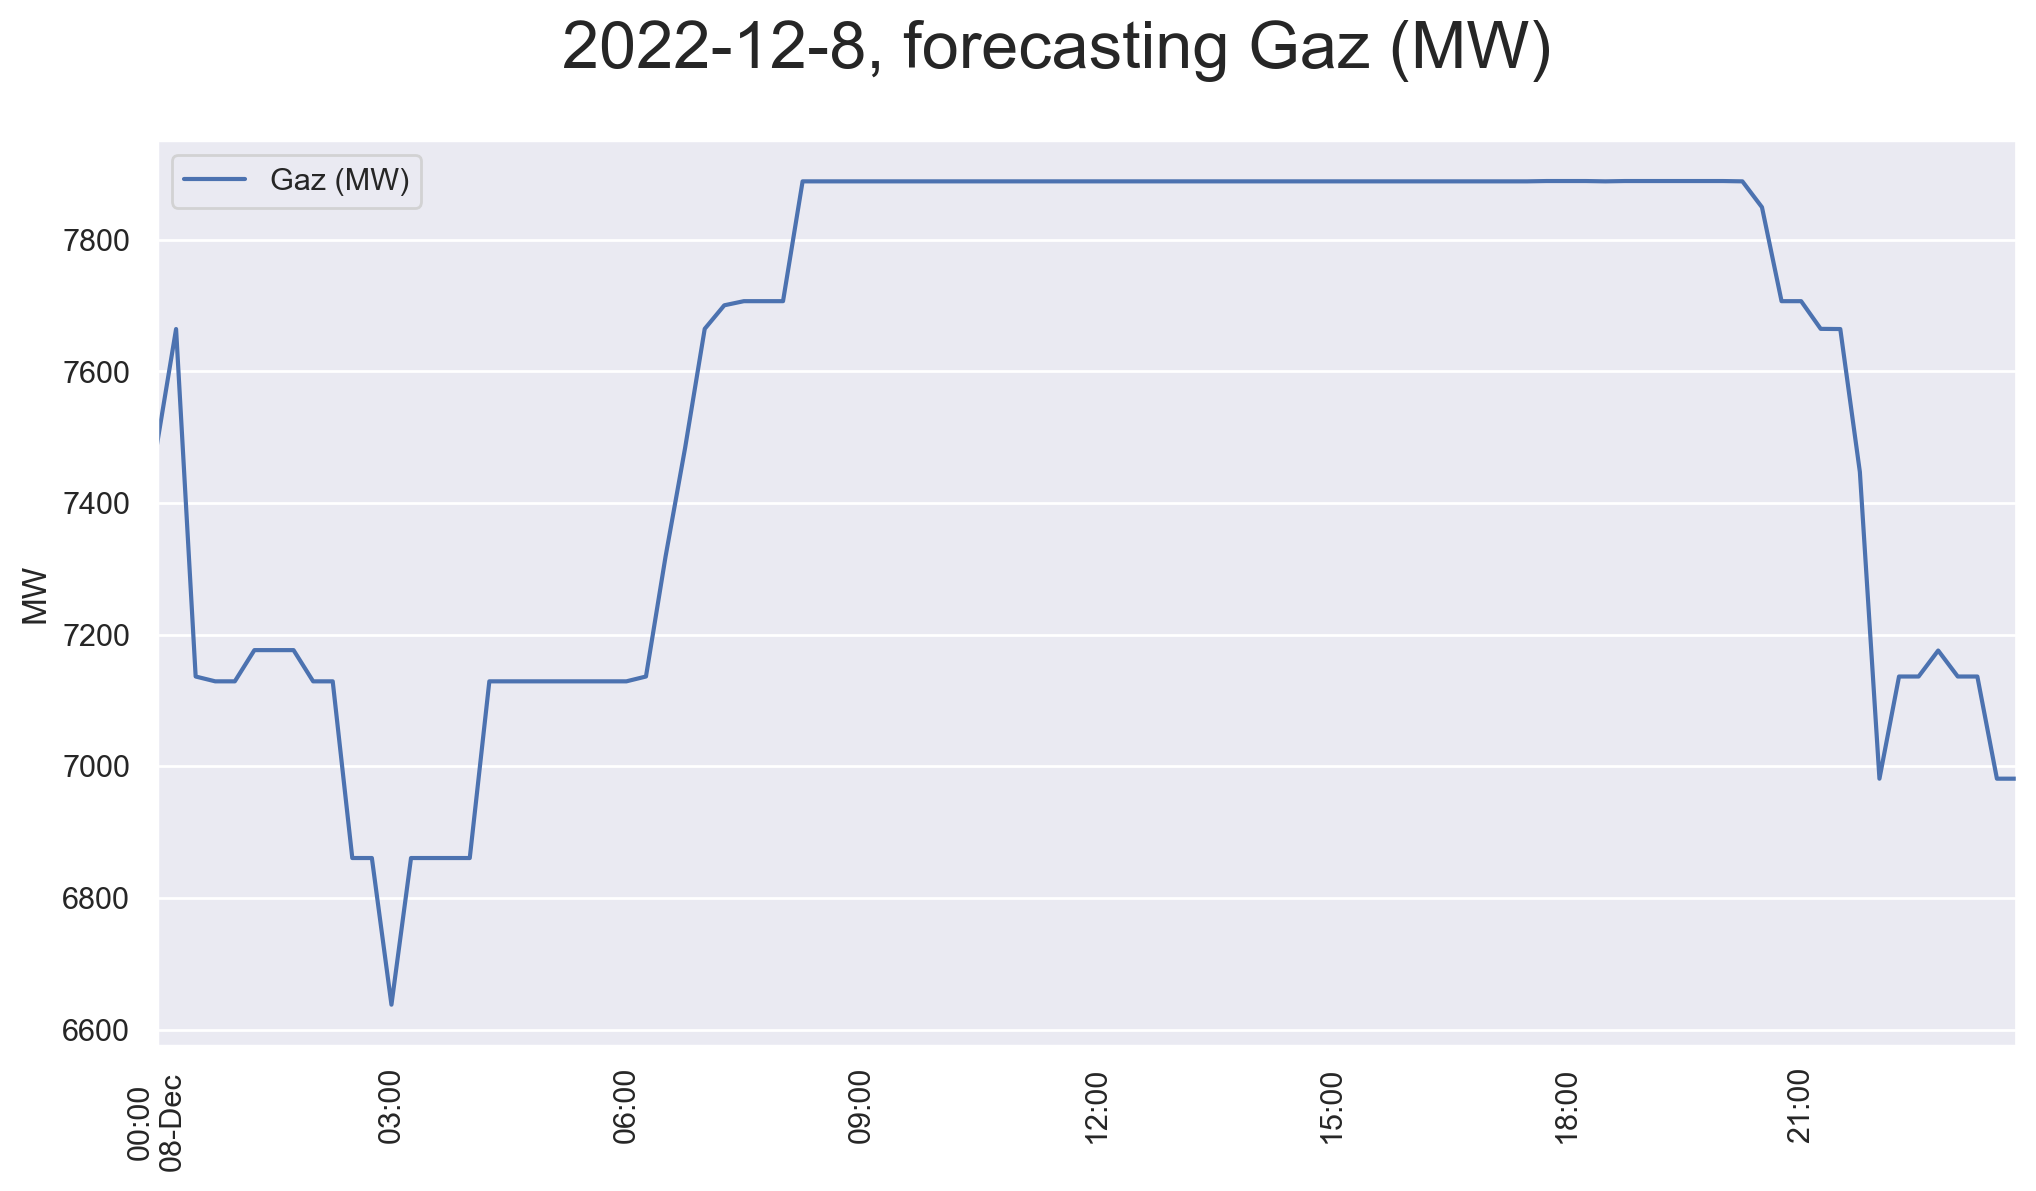

In [17]:
Model.plot(dayPred,date)